# Titanic: Machine Learning from Disaster

## Problem Statement
The Titanic dataset consists of information about passengers on the Titanic. The goal is to predict whether a passenger survived the shipwreck, given certain features like age, gender, class, and fare. This is a classic binary classification problem, where we need to classify passengers as either "Survived" (1) or "Did Not Survive" (0).

## Objective
The main objective of this project is to:
- Perform **Exploratory Data Analysis (EDA)** to understand the dataset and its features.
- Clean the data by handling missing values and encoding categorical variables.
- Apply machine learning algorithms (e.g., Logistic Regression, Decision Tree) to predict survival outcomes.
- Evaluate model performance and analyze results to improve accuracy.

## Dataset Description
The dataset consists of the following columns:
- **PassengerId**: A unique identifier for each passenger.
- **Pclass**: The passenger's class (1st, 2nd, or 3rd).
- **Name**: The passenger's name.
- **Sex**: The gender of the passenger.
- **Age**: The age of the passenger in years.
- **SibSp**: The number of siblings or spouses aboard the Titanic.
- **Parch**: The number of parents or children aboard the Titanic.
- **Ticket**: The ticket number.
- **Fare**: The fare the passenger paid for the journey.
- **Cabin**: The cabin where the passenger stayed.
- **Embarked**: The port at which the passenger boarded (C = Cherbourg, Q = Queenstown, S = Southampton).
- **Survived**: Target variable indicating whether the passenger survived (1) or not (0).

## Project Flow
1. **Exploratory Data Analysis (EDA)**: Understand the data, handle missing values, and visualize important relationships.
2. **Data Preprocessing**: Clean the data (handle missing values, encode categorical variables, etc.).
3. **Modeling**: Train machine learning models to predict survival.
4. **Evaluation**: Evaluate model performance using metrics like accuracy and confusion matrix.
5. **Conclusion**: Summarize findings and potential next steps.


## Import Libraries and Load Data

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for better visualization
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Loading the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Quick overview of the training data
train.head()  # Shows the first 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()  # Summary of dataset (e.g., types, null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(train.describe())  # Descriptive statistics of numerical features

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Exploratory Data Analysis (EDA)

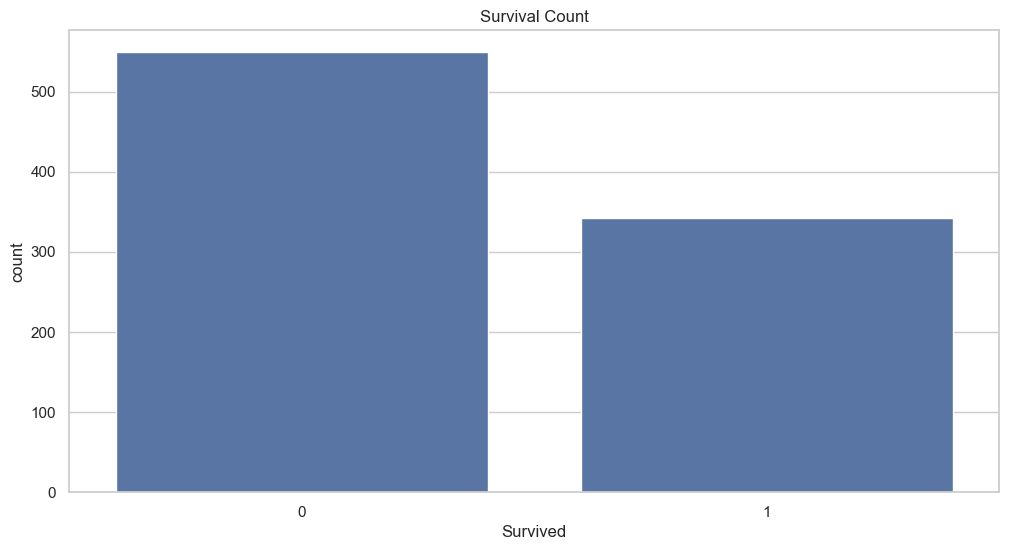

Overall survival rate: 0.38


In [7]:
#Survival Rate Analysis
# Check survival distribution
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')
plt.show()

# Overall survival rate
survival_rate = train['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2f}")

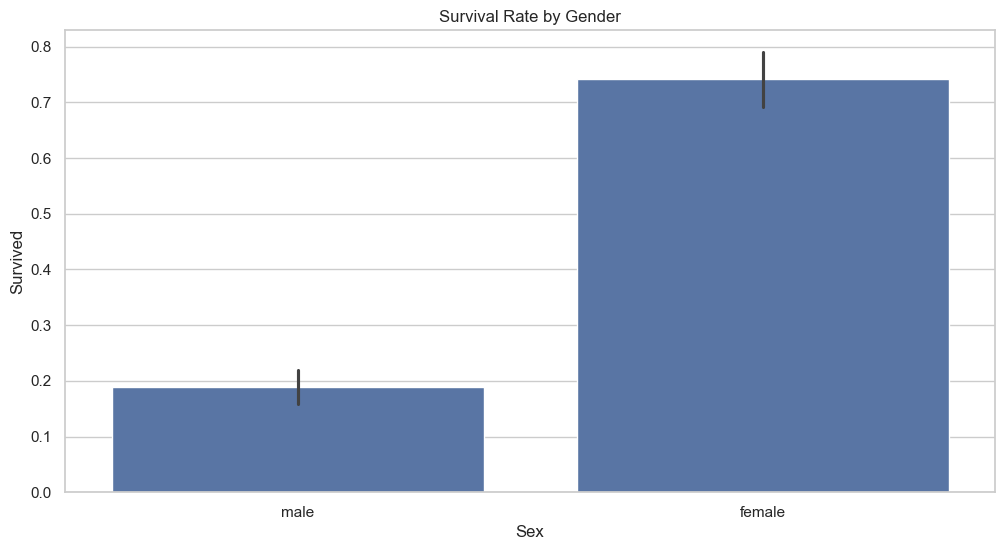

In [8]:
#Survival by Gender
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.show()

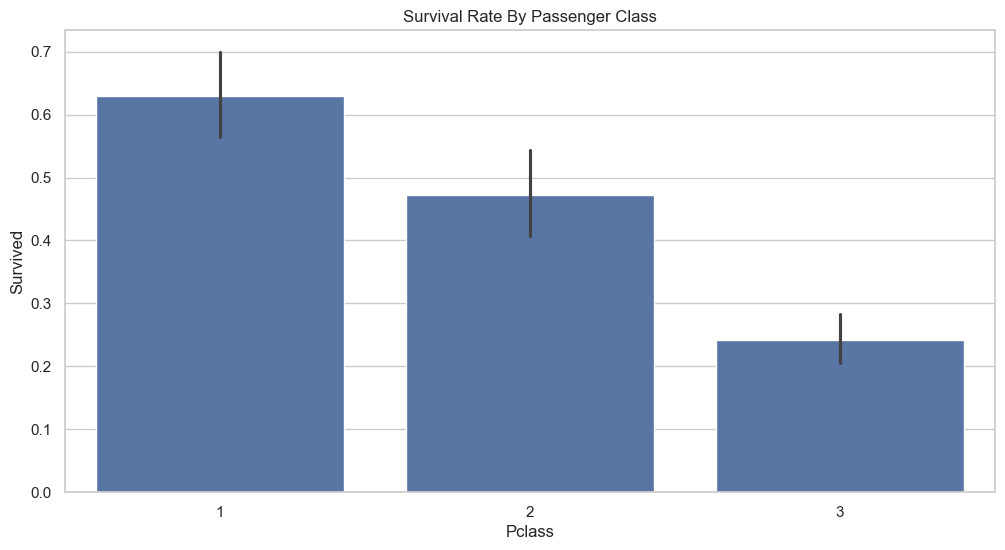

In [9]:
#Survival by Class
sns.barplot(x='Pclass',y='Survived', data=train)
plt.title('Survival Rate By Passenger Class')
plt.show()

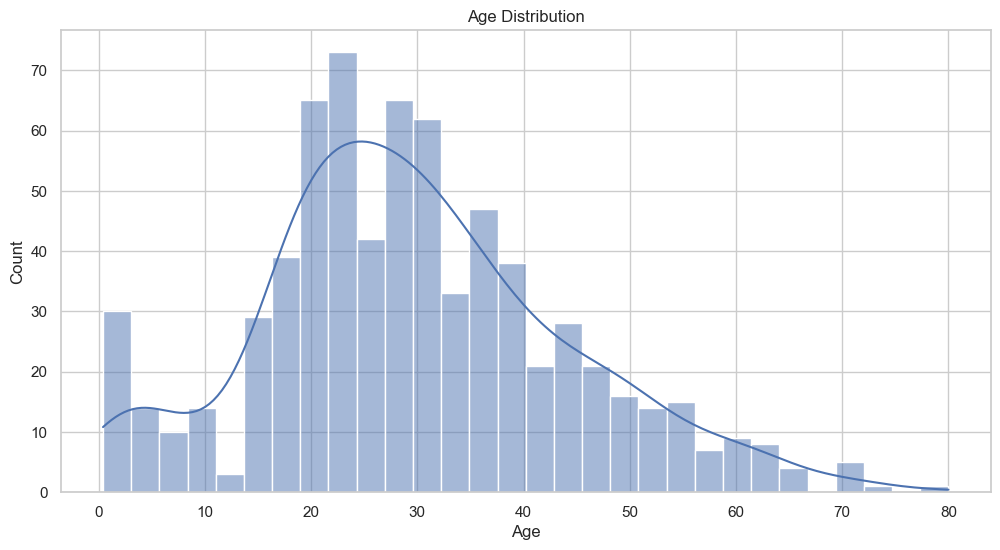

In [10]:
# Survival by Age Distribution
sns.histplot(train['Age'].dropna(),bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

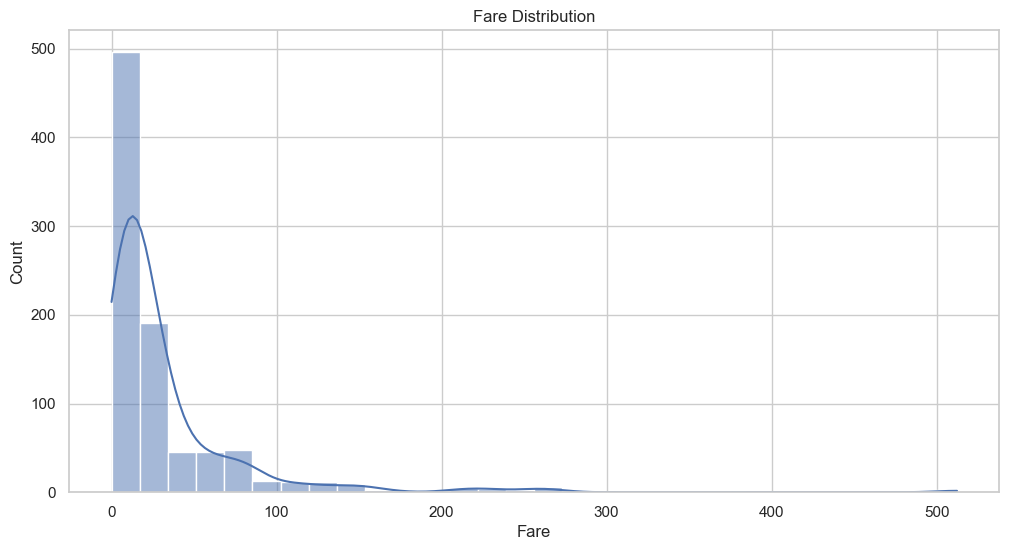

In [11]:
# Fare Distribution
sns.histplot(train['Fare'],bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

## Missing Data

In [13]:
# Check for Missing Value in Each COlumn
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [15]:
# Fill Missing Age Values with Median
train['Age'] = train['Age'].fillna(train['Age'].median())

In [16]:
## Since most of the values in the Cabin column are missing, we’ll drop it.
train.drop('Cabin', axis=1, inplace=True)

In [17]:
# Encode Categorical Variables --> We need to convert Sex and Embarked into numerical values.
# Convert 'Sex' column to 0 (female) and 1 (male)
train['Sex'] = train['Sex'].map({'female':0,'male':1})
## Convert 'Embarked' column to numerical values (C=0, Q=1, S=2)
train['Embarked'] = train['Embarked'].map({'C':0,'Q':1,'S':2})

In [39]:
# Handle Missing Embarked Values --> For the missing Embarked values, we can fill them with the most frequent value.
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


## Feature Engineering
## Let’s create a few additional features that might be useful for prediction.


In [45]:
# Family Size --> Add a new feature combining SibSp (siblings/spouses) and Parch (parents/children):
train['Family Size'] = train['SibSp'] + train['Parch'] + 1

In [52]:
# IsAlone --> Create a feature indicating whether the passenger was alone:
train['IsAlone'] = train['Family Size'].apply(lambda x: 1 if x == 1 else 0)

In [58]:
# Age Bins --> Create categorical age groups:
bins = [0, 12, 18, 40, 60, 100]
labels = ['Child','Teenager','Adult','Senior','Elderly']
train['AgeGroup'] = pd.cut(train['Age'],bins, labels=labels)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,IsAlone,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2.0,2,0,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0.0,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2.0,1,1,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2.0,2,0,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2.0,1,1,Adult


## Modeling

## Prepare Features and Target

In [73]:
X = train[['Pclass','Sex','Age','Fare','Embarked','Family Size','IsAlone']]
y = train['Survived']

## Train Test Split

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_Val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=42)

## Train the Model

In [79]:
from sklearn.linear_model import LogisticRegression

#Initialize the Model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

## Model Evaluation
## Let’s evaluate the model’s performance using accuracy, confusion matrix, and classification report.

In [85]:
# Accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_Val)
accuracy = accuracy_score(y_val,y_pred)
print(f"Model Accuracy = {accuracy :2f}")

Model Accuracy = 0.798883


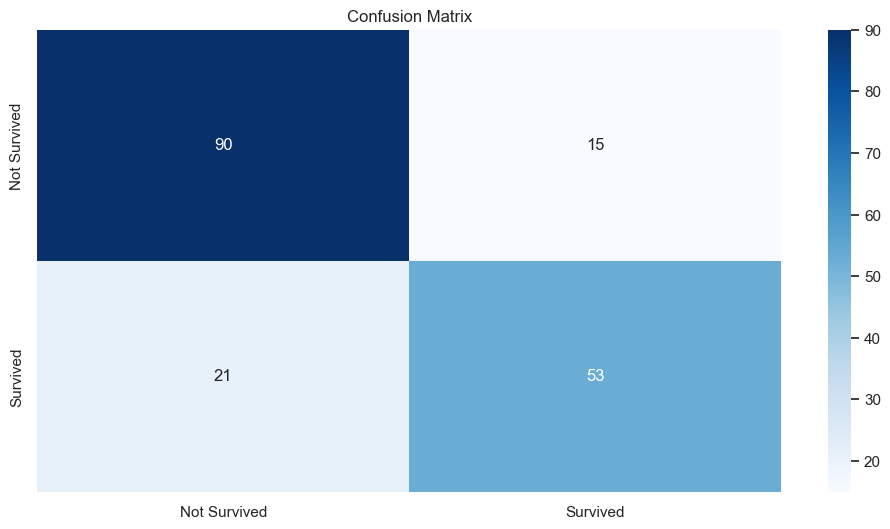

In [87]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.show()

In [91]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Conclusion
- The logistic regression model has a reasonable accuracy.
- The model performed well, but there is room for improvement.
- Next steps could include trying different models (e.g., Random Forest, XGBoost) or tuning hyperparameters.

## Further Work
- Apply advanced machine learning models (e.g., Random Forest, XGBoost).
- Use **ensemble methods** to improve accuracy.
- Tune model hyperparameters to improve performance.

## Implement Random Forest and XGBoost Models

In [103]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
#Train the Model
rf_model.fit(X_train, y_train)

#Make Prediction
rf_y_pred = rf_model.predict(X_Val)

#Evaluate the Model
from sklearn.metrics import accuracy_score
rf_accuracy = accuracy_score(y_val, rf_y_pred)
print(f"Random forest Accuracy = {rf_accuracy: 2f}")

Random forest Accuracy =  0.832402


## XGBoost Model

In [155]:
!pip install xgboost

In [135]:
# Now Let's Implement XGBoost Model
import xgboost as xgb
from sklearn.metrics import accuracy_score

#Initialize the XGBoost Model
xgb_model = xgb.XGBClassifier(random_state = 42)

#Train the model
xgb_model.fit(X_train, y_train)

#Make Predictions
xgb_y_pred = xgb_model.predict(X_Val)

#Evaluate the Model
xgb_accuracy = accuracy_score(y_val, xgb_y_pred)
print(f"XGB Model Accuracy = {xgb_accuracy : 2f}")

XGB Model Accuracy =  0.782123


## Hyperparameter Tuning

In [127]:
#  we will tune the hyperparameters of the Logistic Regression model using GridSearchCV to improve its performance.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Define Hyperparameters for tuning
param_grid = {
    'C':[0.01, 0.1, 1, 10, 100], #Regularization Strength
    'penalty': ['l1','l2'], # Regularization Type
    'solver':['liblinear'], #Solver for Small Dataset
}

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid, cv=5)

#Train the Model with Hyperparameter Tuning
grid_search.fit(X_train, y_train)

#Best Parameters found by GridSearchCV
best_logreg_params = grid_search.best_params_

#Best Logistic Regression Parameters
print("Best Logistic Regression Parameters = " + str(best_logreg_params ))


#Evaluate the Tuned Model
tuned_model = grid_search.best_estimator_
tuned_y_pred = tuned_model.predict(X_Val)

#Evaluate Accuracy
tuned_accuracy = accuracy_score(y_val, tuned_y_pred)
print(f"Tuned Accuracy = {tuned_accuracy: 2f}")

Best Logistic Regression Parameters = {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Accuracy =  0.798883


## Model Comparison and Final Evaluation

## Classification Report for All Models

In [137]:
from sklearn.metrics import classification_report

#Logestic Regression Tuned
print("Logistic Regression Tuned Classification Report")
print(classification_report(y_val, tuned_y_pred))

#Random Forest
print("Random Forest Classification Report")
print(classification_report(y_val, rf_y_pred))

#XGBoost Classification Report
print("XGBoost Classification Report")
print(classification_report(y_val, xgb_y_pred))

Logistic Regression Tuned Classification Report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       105
           1       0.73      0.74      0.74        74

    accuracy                           0.78       179
   macro avg  

## Confusion Matrix for All Models

Logistic Regression (Tuned) Confusion Matrix:


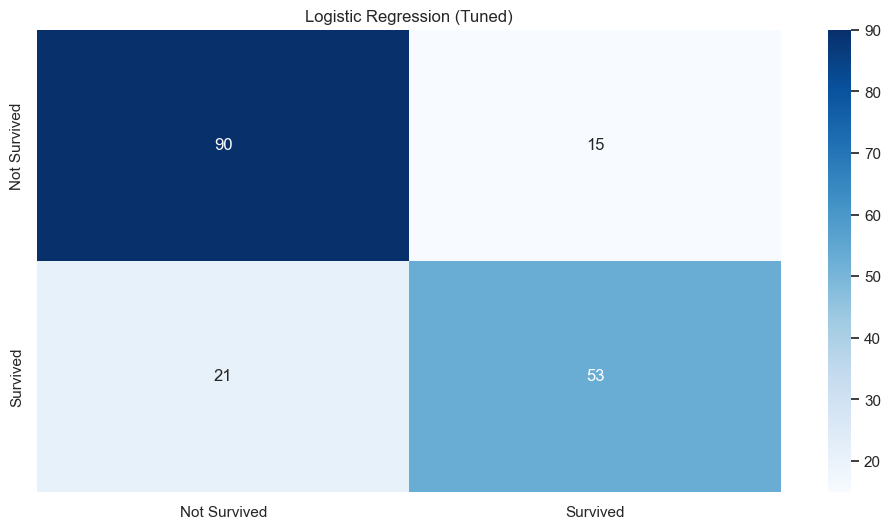

Random Forest Confusion Matrix


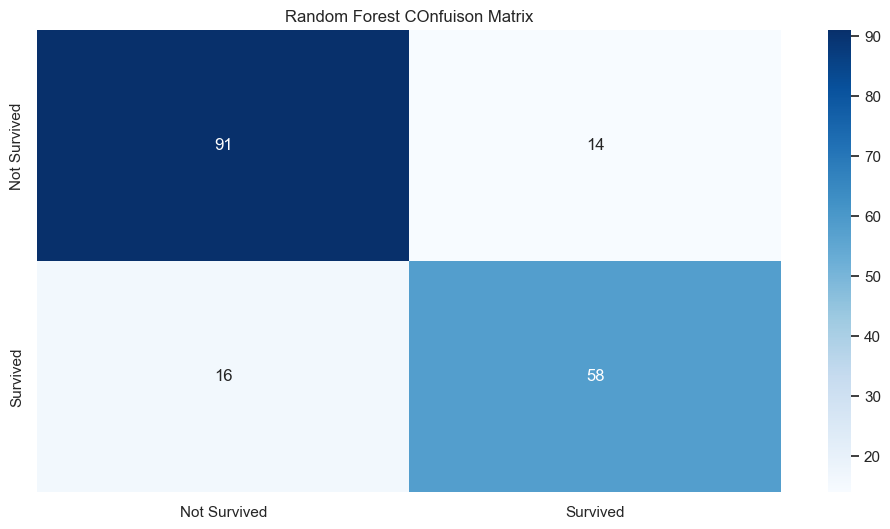

XGBoost COnfusion Matrix


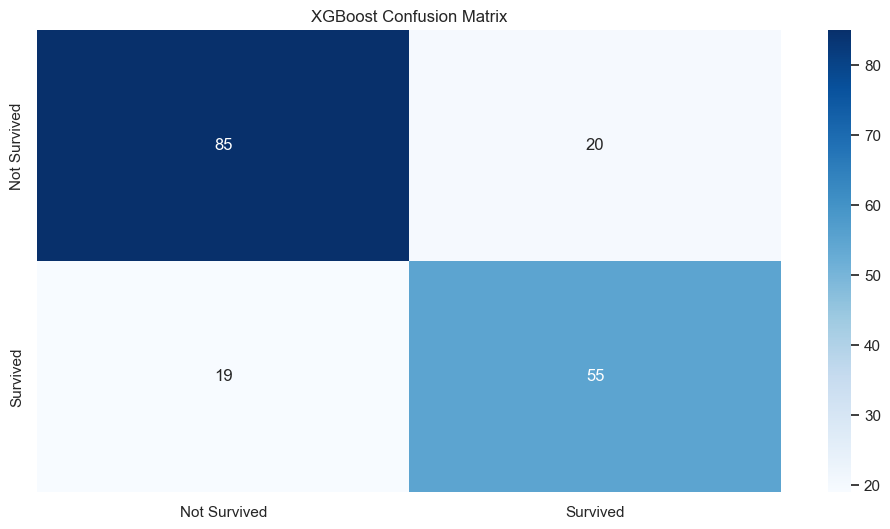

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Logistic Regeression(Tuned)
print("Logistic Regression (Tuned) Confusion Matrix:")
sns.heatmap(confusion_matrix(y_val, tuned_y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Logistic Regression (Tuned)')
plt.show()

#Random Forest Confusion Matrix
print('Random Forest Confusion Matrix')
sns.heatmap(confusion_matrix(y_val, rf_y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Random Forest COnfuison Matrix')
plt.show()

# XGBoost COnfusion Matrix
print('XGBoost COnfusion Matrix')
sns.heatmap(confusion_matrix(y_val,xgb_y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('XGBoost Confusion Matrix')
plt.show()

##  Next Steps & Improvements


In [159]:
# Ensemble Methods: consider combining them using stacking or voting classifiers.
# Voting Classifier (Ensemble of Models)
from sklearn.ensemble import VotingClassifier

# Create a voting classifier combining all models
voting_clf = VotingClassifier(estimators=[
    ('logreg', tuned_model),
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='hard')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Make predictions
voting_y_pred = voting_clf.predict(X_Val)

# Evaluate the ensemble model
voting_accuracy = accuracy_score(y_val, voting_y_pred)
print(f"Ensemble Voting Classifier Accuracy: {voting_accuracy:.2f}")


Ensemble Voting Classifier Accuracy: 0.84


## - Logistic Regression gave a strong baseline model.
- Random Forest performed better by capturing more complex patterns.
- XGBoost had slightly lower performance but can improve with tuning.
- Ensemble (Voting Classifier) achieved the best results by combining strengths of all models.

This shows the power of ensemble methods in improving machine learning model performance!
